# Loss Function, Optimization 과제
> 인공지능 스터디 세 번째 과제에 오신 것을 환영합니다! 강의를 들으면서 배운 다양한 지식들을 실습을 통해서 활용해 볼 시간을 가질 것입니다!

🐙<br>
이번 과제는 퀴즈와 실습으로 이루어져 있어요!

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> Cross Entropy Loss (단일선택)
```python
Cross Entropy Loss 함수가 주로 사용되는 경우는?


(1) 연속적인 값을 예측하는 회귀 문제
(2) 이진 분류 문제
(3) 군집화 문제
(4) 시계열 예측 문제

```

```python
😉
[정답] (1)
```

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> Regularization (단일선택)
```
L1 Regularization(Lasso)의 특징으로 올바른 것은?

(1) 모든 특성의 가중치를 균등하게 감소시킨다
(2) 특성 선택에 효과가 있다
(3) 항상 L2 Regularization보다 좋은 성능을 낸다
(4) 미분이 불가능한 지점이 없어 최적화가 쉽다

```

```python
😉
[정답] (1)
```

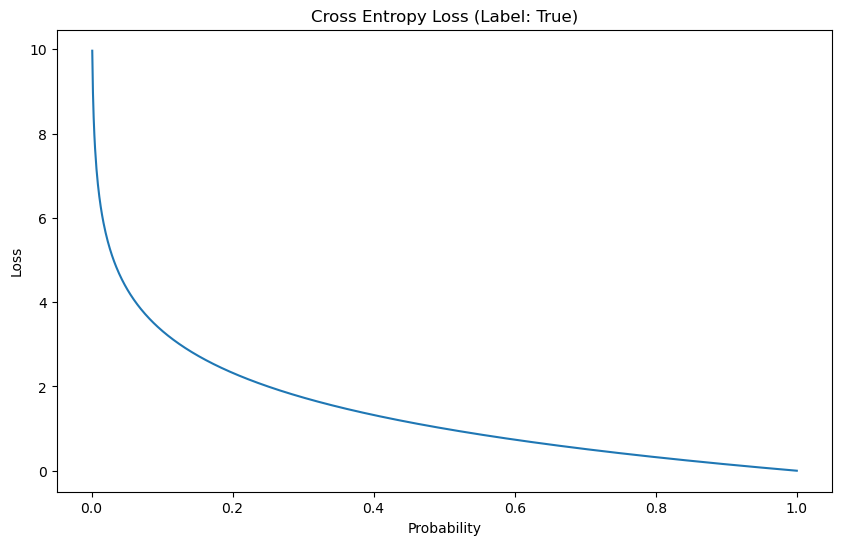

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35196\690516492.py:24: RuntimeWarning: divide by zero encountered in log2
  return -1 * np.log2(self.p) if self.label else -1 * np.log2(1 - self.p)


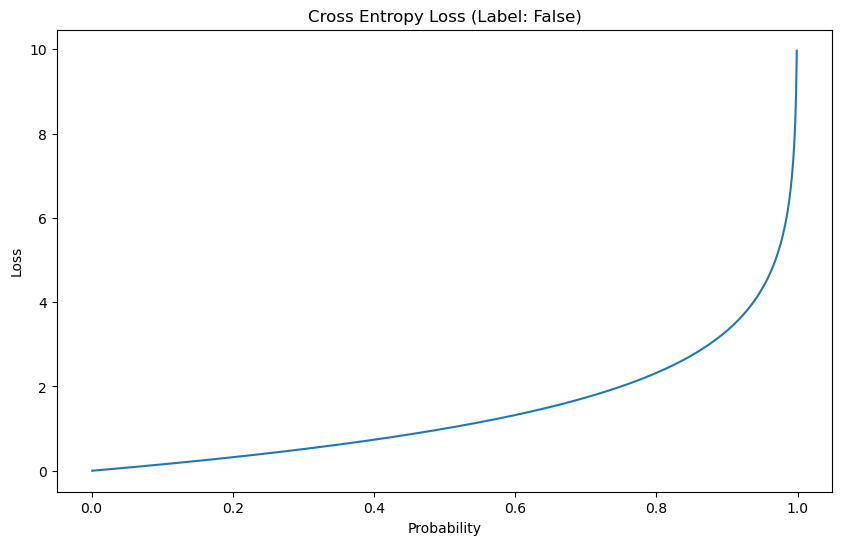

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LossFunction:
    """손실 함수를 계산하고 시각화하는 클래스"""
    
    def __init__(self, label: bool = True) -> None:
        """
        LossFunction 클래스의 생성자
        
        :param label: True는 양성 클래스, False는 음성 클래스를 나타냄
        """
        self.label = label
        # 0.001부터 1.0까지 1000개의 균일한 간격의 확률값 생성
        self.p = np.linspace(start=0.001, stop=1.0, num=1000)
    
    def get_cross_entropy(self) -> np.ndarray:
        """
        Binary Cross Entropy Loss 계산
        
        :return: 각 확률값에 대한 Cross Entropy Loss 배열
        """
        # label이 True일 때와 False일 때의 계산식이 다름. 강의자료 참고
        return -1 * np.log2(self.p) if self.label else -1 * np.log2(1 - self.p)
    
    def get_squared_error(self) -> np.ndarray:
        """
        Squared Error Loss 계산
        
        :return: 각 확률값에 대한 Squared Error Loss 배열
        """
        # label이 True일 때와 False일 때의 계산식이 다름
        return np.square(1 - self.p) if self.label else np.square(self.p)
    
    def plot_loss(self, loss_type: str) -> None:
        """
        지정된 손실 함수의 그래프를 그림
        
        :param loss_type: 'Cross Entropy' 또는 'Squared Error'
        """
        plt.figure(figsize=(10, 6))  # 그래프 크기 설정
        plt.xlabel('Probability')    # x축 레이블
        plt.ylabel('Loss')           # y축 레이블
        plt.title(f'{loss_type} Loss (Label: {self.label})')  # 그래프 제목
        
        # 손실 함수 유형에 따라 적절한 메서드 호출
        if loss_type == 'Cross Entropy':
            loss = self.get_cross_entropy()
        elif loss_type == 'Squared Error':
            loss = self.get_squared_error()
        else:
            raise ValueError("Invalid loss type. Use 'Cross Entropy' or 'Squared Error'.")
        
        plt.plot(self.p, loss)  # 그래프 그리기
        plt.show()              # 그래프 표시

def compare_losses(label: bool) -> None:
    """
    Cross Entropy Loss와 Squared Error Loss를 같은 그래프에 그려 비교
    
    :param label: True는 양성 클래스, False는 음성 클래스를 나타냄
    """
    loss_func = LossFunction(label)
    
    plt.figure(figsize=(12, 6))  # 그래프 크기 설정
    plt.xlabel('Probability')    # x축 레이블
    plt.ylabel('Loss')           # y축 레이블
    plt.title(f'Cross Entropy vs Squared Error Loss (Label: {label})')
    
    # 두 손실 함수의 그래프를 같은 평면에 그림
    plt.plot(loss_func.p, loss_func.get_cross_entropy(), label='Cross Entropy')
    plt.plot(loss_func.p, loss_func.get_squared_error(), label='Squared Error')
    
    plt.legend()  # 범례 표시
    plt.show()    # 그래프 표시

# 실습 1: Cross Entropy Loss 시각화
loss_func_true = LossFunction(True)   # 양성 클래스(label=True)에 대한 LossFunction 객체 생성
loss_func_true.plot_loss('Cross Entropy')  # 양성 클래스의 Cross Entropy Loss 그래프 그리기

loss_func_false = LossFunction(False)  # 음성 클래스(label=False)에 대한 LossFunction 객체 생성
loss_func_false.plot_loss('Cross Entropy')  # 음성 클래스의 Cross Entropy Loss 그래프 그리기

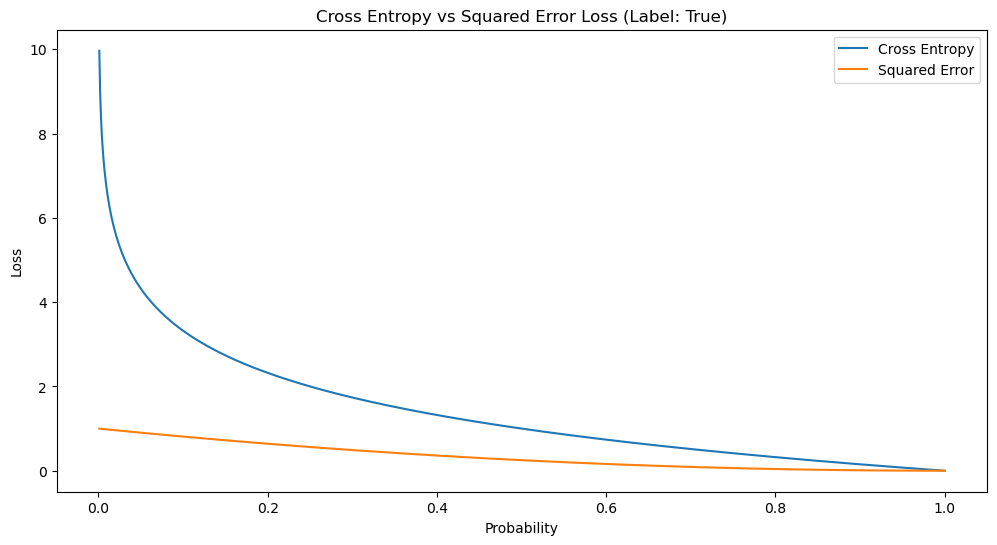

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35196\690516492.py:24: RuntimeWarning: divide by zero encountered in log2
  return -1 * np.log2(self.p) if self.label else -1 * np.log2(1 - self.p)


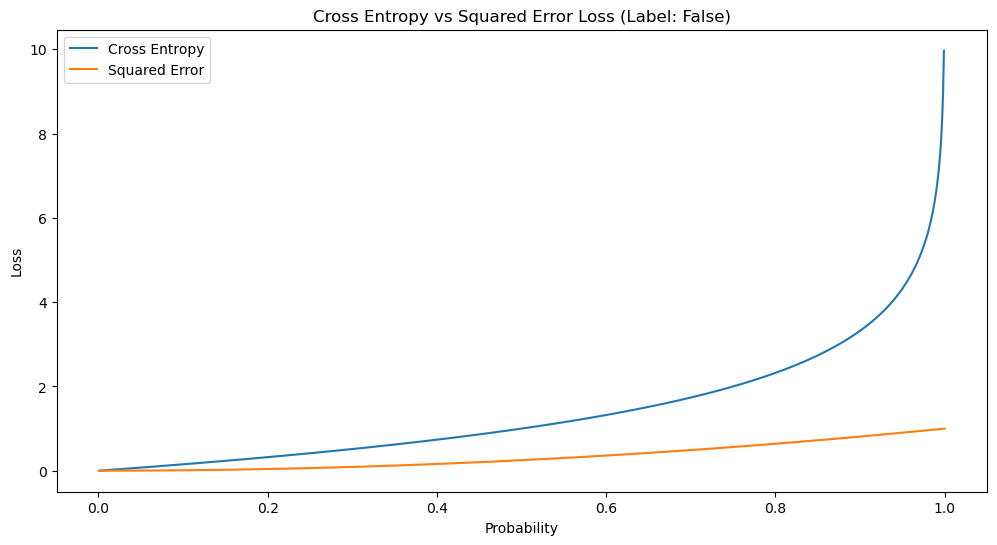

In [2]:
compare_losses(True)
compare_losses(False)

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> Squared Error Loss와 Cross Entropy Loss (단일선택)
```
Label이 True일 때, Squared Error Loss와 Cross Entropy Loss를 비교했을 때 어느 쪽이 극단적인 오류(예측이 실제와 매우 다른 경우)에 대해 더 큰 페널티를 부여하나요?

(1) Squared Error Loss
(2) Cross Entropy Loss
(3) 둘 다 동일한 페널티를 부여한다
(4) 예측 확률에 따라 다르다

```


```python
😉
[정답] (2)
```

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> Squared Error Loss와 Cross Entropy Loss (주관식)
```
Cross Entropy Loss와 Squared Error Loss 중 어느 것이 이진 분류 문제에서 더 자주 사용되며, 그 이유는 무엇인가요?


```


```python
😉
정답 Cross Entrophy Loss. 신경망의 출력을 유의미한 확률 분포로 변환하기 위해서이다.
```


#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> 정규화(Regularization)의 주요 목적은 무엇인가요? (단일선택)
```
(1) 모델의 학습 속도를 높이는 것
(2) 모델의 복잡성을 줄이고 과적합을 방지하는 것
(3) 모델의 파라미터 수를 증가시키는 것
(4) 데이터셋의 크기를 확장하는 것

```


```python
😉
[정답] (2)
```

#### ❓ <font color='red'><b>[ 참고자료 ]</b></font> 참고자료

추가적으로 optimization 기법 중 AdamW 기법에 대한 잘 설명해놓은 글이 있어 첨부해놓았습니다. 논문 리뷰라서 어려울 수도 있지만, 궁금하시면 한번씩 읽어보세요!

https://hiddenbeginner.github.io/deeplearning/paperreview/2019/12/29/paper_review_AdamW.html

### 🎉🎉🎉 4주차 과제 완료! 🎉🎉🎉
```python
🐙
여러분 모두 수고 했어요!!
```